 # TRABAJO DETECCIÓN ANOMALIAS. 
 ### DEEP LEARNING
 #####   MANEL SOLER SANZ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn import datasets
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.layers import Input, Dense , Conv2D, MaxPooling2D, UpSampling2D,Dropout
from keras.models import Model
#SciPy: scientific tools
import scipy.io.matlab as matlab
import librosa, librosa.display



# Data set : 

This repository contains the PHL-EC dataset used in the classification problem for exoplanets. The data set is used in the manuscript "Habitability Classification of Exoplanets: A Machine Learning Insight"

In [ ]:
url = "https://raw.githubusercontent.com/mathurarchana77/Habitability-PHL-EC-Dataset/main/PHL-EC.csv"
data = pd.read_csv(url) 
data.head()

,P. Name,P. Name Kepler,P. Name KOI,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Min Mass (EU),P. Mass (EU),...,P. Int ESI,P. Surf ESI,P. ESI,S. HabCat,P. Habitable,P. Hab Moon,P. Confirmed,P. Disc. Method,P. Disc. Year,Unnamed: 68
0,1RXS 1609 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4451.16,...,0,0,0.05,0,0,0,1,Imaging,2008,NaN
1,1SWASP J1407 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,6358.80,...,0,0,0.07,0,0,0,1,Primary Transit,2012,NaN
2,2M 0103-55(AB) b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,4133.22,4133.22,...,0,0,0.06,0,0,0,1,Imaging,2013,NaN
3,2M 0122-24 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,6358.80,...,0,0,0.08,0,0,0,1,Imaging,2013,NaN
4,2M 0219-39 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4419.37,...,0,0,0.06,0,0,0,1,Imaging,2015,NaN


In [ ]:
data.shape


(3875, 69)

## Pre-procesado de los datos

No podemos utilizar el data set en nuestros autoendocers sin antes preprocesar los datos y adecuarlos para nuestro objetivo: *Detectar planetas habitables como anomalias.*

Primeramente vamos a analizar los datos no númericos:

In [ ]:
for y in data.columns:
    if (is_string_dtype(data[y])):
        #num_data.drop(y, axis=1, inplace=True)
        print(y)
    #elif (is_numeric_dtype(num_data[y])):
        #print(y,"numeric")


P. Name
P. Name Kepler
P. Zone Class
P. Mass Class
P. Composition Class
P. Atmosphere Class
P. Habitable Class
P. SFlux Min (EU)
P. SFlux Mean (EU)
P. SFlux Max (EU)
S. Name
S. Name HD
S. Name HIP
S. Constellation
S. Type
P. Disc. Method
P. Disc. Year


In [ ]:
data["P. Zone Class"]

0       Cold
1       Cold
2       Cold
3       Cold
4       Cold
        ... 
3870     Hot
3871     Hot
3872     Hot
3873     Hot
3874     Hot
Name: P. Zone Class, Length: 3875, dtype: object

Las variables de flujo deberian ser númericas : 

In [ ]:
data["P. SFlux Min (EU)"] = pd.to_numeric(data["P. SFlux Min (EU)"],errors='coerce')
data["P. SFlux Mean (EU)"] = pd.to_numeric(data["P. SFlux Mean (EU)"],errors='coerce')
data["P. SFlux Max (EU)"] = pd.to_numeric(data["P. SFlux Max (EU)"],errors='coerce')

Vamos a codificar algunad variables que son categóricas como númericas, porque creemos que es informcación útil para abordar el problema. Para ello utilizaremos la funcion se sklearn : `OrdinalEncoder`

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["P. Atmosphere Class_code"] = ord_enc.fit_transform(data[["P. Atmosphere Class"]])
ord_enc = OrdinalEncoder()
data["P. Mass Class_code"] = ord_enc.fit_transform(data[["P. Mass Class"]])
ord_enc = OrdinalEncoder()
data["P. Composition Class_code"] = ord_enc.fit_transform(data[["P. Composition Class"]])

ord_enc = OrdinalEncoder()
data["P. Zone Class_code"] = ord_enc.fit_transform(data[["P. Zone Class"]])



Nos quedamos con los númericos

---
Una vez hemos codificado los categóricos elegidos  como númericos, vamos a eliminar todos los categóricos, ya que estos no vamos a poder utilizarlos en nuestro autoencoder


---





In [ ]:
num_data = data.copy()

for y in num_data.columns:
    if (is_string_dtype(num_data[y])):
        num_data.drop(y, axis=1, inplace=True)

    elif (is_numeric_dtype(num_data[y])):
        print(y,"numeric")

P. Name KOI numeric
P. Min Mass (EU) numeric
P. Mass (EU) numeric
P. Max Mass (EU) numeric
P. Radius (EU) numeric
P. Density (EU) numeric
P. Gravity (EU) numeric
P. Esc Vel (EU) numeric
P. SFlux Min (EU) numeric
P. SFlux Mean (EU) numeric
P. SFlux Max (EU) numeric
P. Teq Min (K) numeric
P. Teq Mean (K) numeric
P. Teq Max (K) numeric
P. Ts Min (K) numeric
P. Ts Mean (K) numeric
P. Ts Max (K) numeric
P. Surf Press (EU) numeric
P. Mag numeric
P. Appar Size (deg) numeric
P. Period (days) numeric
P. Sem Major Axis (AU) numeric
P. Eccentricity numeric
P. Mean Distance (AU) numeric
P. Inclination (deg) numeric
P. Omega (deg) numeric
S. Mass (SU) numeric
S. Radius (SU) numeric
S. Teff (K) numeric
S. Luminosity (SU) numeric
S. [Fe/H] numeric
S. Age (Gyrs) numeric
S. Appar Mag numeric
S. Distance (pc) numeric
S. RA (hrs) numeric
S. DEC (deg) numeric
S. Mag from Planet numeric
S. Size from Planet (deg) numeric
S. No. Planets numeric
S. No. Planets HZ numeric
S. Hab Zone Min (AU) numeric
S. Hab Zo

In [ ]:
print("Nans en total", data.isnull().sum().sum()) # Nans en total


print( "Numero e planetas habitables", np.sum(num_data["P. Habitable"][num_data["P. Habitable"]==1]))
print( "Numero de planetas NO habitables",(np.sum(num_data["P. Habitable"]==0)))

num_data.shape

Nans en total 40930
Numero e planetas habitables 55
Numero de planetas NO habitables 3820


(3875, 59)

In [ ]:
df =num_data.copy()

## borramos esta columna porque no nos sirve
df.drop("Unnamed: 68", axis=1, inplace=True)

Tenemos columnas donde tenemos todo zeros o NaNs:



> Estas columnas las eliminaremos


In [ ]:
print(df[~df['P. Max Mass (EU)'].isnull()])

print(np.sum(df['P. Int ESI']))

print(np.sum(df['P. Surf ESI']))

Empty DataFrame
Columns: [P. Name KOI, P. Min Mass (EU), P. Mass (EU), P. Max Mass (EU), P. Radius (EU), P. Density (EU), P. Gravity (EU), P. Esc Vel (EU), P. SFlux Min (EU), P. SFlux Mean (EU), P. SFlux Max (EU), P. Teq Min (K), P. Teq Mean (K), P. Teq Max (K), P. Ts Min (K), P. Ts Mean (K), P. Ts Max (K), P. Surf Press (EU), P. Mag, P. Appar Size (deg), P. Period (days), P. Sem Major Axis (AU), P. Eccentricity, P. Mean Distance (AU), P. Inclination (deg), P. Omega (deg), S. Mass (SU), S. Radius (SU), S. Teff (K), S. Luminosity (SU), S. [Fe/H], S. Age (Gyrs), S. Appar Mag, S. Distance (pc), S. RA (hrs), S. DEC (deg), S. Mag from Planet, S. Size from Planet (deg), S. No. Planets, S. No. Planets HZ, S. Hab Zone Min (AU), S. Hab Zone Max (AU), P. HZD, P. HZC, P. HZA, P. HZI, P. SPH, P. Int ESI, P. Surf ESI, P. ESI, S. HabCat, P. Habitable, P. Hab Moon, P. Confirmed, P. Atmosphere Class_code, P. Mass Class_code, P. Composition Class_code, P. Zone Class_code]
Index: []

[0 rows x 58 column

In [ ]:
# lo borramos


for y in df.columns:
  if(np.mean(df[y]) == 0 or np.isnan(np.mean(df[y])) == True):
    df.drop(y, axis=1, inplace=True)

df.shape

(3875, 55)

Borramos todas las columnas que tengans más de 800 NaNs:

In [ ]:

print("columnas sin NaN: ",48-np.sum(df.isnull().any()))

df.isnull().any()
df2 = df.copy()
for y in df.columns:
  if(np.sum(df[y].isnull()) > 800 ):  # tengamos menos de 800 NaNs
    df2.drop(y, axis=1, inplace=True)
print("Nuestro data set actual tiene las siguientes dimesiones:", df2.shape)

columnas sin NaN:  3
Nuestro data set actual tiene las siguientes dimesiones: (3875, 44)


Borramos los datos de plantetas que contengan NaN:

In [ ]:
df2 = df2.dropna(axis = 0)
df2.shape
df2.isnull().any()


P. Mass (EU)                 False
P. Radius (EU)               False
P. Density (EU)              False
P. Gravity (EU)              False
P. Esc Vel (EU)              False
P. SFlux Min (EU)            False
P. SFlux Mean (EU)           False
P. SFlux Max (EU)            False
P. Teq Min (K)               False
P. Teq Mean (K)              False
P. Teq Max (K)               False
P. Surf Press (EU)           False
P. Mag                       False
P. Appar Size (deg)          False
P. Period (days)             False
P. Sem Major Axis (AU)       False
P. Eccentricity              False
P. Mean Distance (AU)        False
P. Omega (deg)               False
S. Mass (SU)                 False
S. Radius (SU)               False
S. Teff (K)                  False
S. Luminosity (SU)           False
S. RA (hrs)                  False
S. DEC (deg)                 False
S. Mag from Planet           False
S. Size from Planet (deg)    False
S. No. Planets               False
S. No. Planets HZ   

Ya tenemos nuestro data set sin valores perdidos. Ahora ya podemos pasar a constuir nuestros detectores de anomalias

---



---

## Autoencoders

---

Preparamos los datos:

In [ ]:
 # Esta serà nuestra varibles respuesta : 

 df2["P. Habitable"]

1       0
6       0
9       0
10      0
17      0
       ..
3870    0
3871    0
3872    0
3873    0
3874    0
Name: P. Habitable, Length: 3632, dtype: int64

Dividimos el data set en variables input y las etiquetas . 

y = 0 : No habitable

y = 1 : Habitable

In [ ]:
X = df2.loc[:, df2.columns != "P. Habitable"]  
y = df2["P. Habitable"]  
print(np.shape(y),np.shape(X))

(3632,) (3632, 43)


In [ ]:
# 1 = outliers, 0 = inliers

print("Numero de outliers : ",np.sum(y== 1))
print("Numero de inliers : ",np.sum(y== 0))

Numero de outliers :  55
Numero de inliers :  3577


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split( 
   # Xf, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=42)



#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Dividimos los sets de entrenamiento y test en Normal Data y Fraud Data:

In [ ]:
train_labels = y_train.astype(bool)
test_labels = y_test.astype(bool)#creating normal and fraud datasets
normal_train_data = X_train[~train_labels]
normal_test_data = X_test[~test_labels]
fraud_train_data = X_train[train_labels]
fraud_test_data = X_test[test_labels]
print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 34
 No. of records in Normal Train data= 2508
 No. of records in Fraud Test Data= 21
 No. of records in Normal Test data= 1069


In [ ]:
np.shape(normal_train_data)

#normal_train_data[np.isnan(normal_train_data)]

(2508, 43)

Ahora que ya tenemos los datos preparados, solo queda construir las diferente arquitecturas que vamos a utilizar para detectar los datos anómalos . 

Vamos a utilizar :

*   AUTO_DEP_AD 
*   PCA + AUTOAD
*   AUTODR + AUTOAD







# AUTO_DEP_AD

### Autoencoder profundo + detecetor de anomalias. 

Construimos un autoencoder que tomará todos los datos y lo entrenaremos con los datos no anómalos. De este modo, esperamos que cuando le entre un dato anómalo, el error de reconstrucción va a ser mayor a los normales, de este modo vamos a poder establecer un threshold para el error de reconstrucción

In [ ]:
#Aquitectura:

dimension_entrada = 43
dimension_codificacion = 10



entrada = Input(shape=(dimension_entrada,))
encoded = Dense(64, activation='relu')(entrada)

encoded = Dense(32, activation='relu')(encoded)
encoded = Dropout(0.1)(encoded)
encoded = Dense(16, activation='relu')(encoded)

encoded = Dense(dimension_codificacion, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(decoded)
decoded= Dropout(0.1)(decoded)
decoded = Dense(64, activation='relu')(decoded)

decodificada = Dense(dimension_entrada, activation='sigmoid')(decoded)

autoencoder = Model(entrada,decodificada) 
autoencoder.compile(optimizer=  'adam' ,loss = 'mse')


history2 = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=50,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(normal_test_data,normal_test_data))

Epoch 1/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0695 - val_loss: 0.0215
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.0200
Epoch 3/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0119
Epoch 4/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 5/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 6/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 7/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 8/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 9/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 10/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 11/50
79/79 [

In [ ]:
## Le pasamos los datos de test al autoencoder ya entrenado

test_x_predictions = autoencoder.predict(X_test)
mse = np.mean(np.abs(X_test-test_x_predictions)**2
                    , axis = tuple(range(1,X_test.ndim)))

# alamacenamos el error de cada uno junto con su etiqueta
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

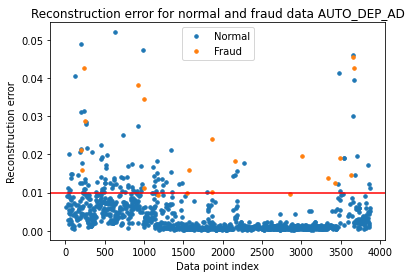

In [ ]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
threshold =  np.mean( error_df[error_df["True_class"]==True]["Reconstruction_error"])-np.std( error_df[error_df["True_class"]==True]["Reconstruction_error"])
plt.axhline(y= threshold, color='r', linestyle='-')
plt.title("Reconstruction error for normal and fraud data AUTO_DEP_AD")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
print(np.mean(error_df[error_df["True_class"]==False]))
print(np.mean(error_df[error_df["True_class"]==True]))

teoric_fraud = []
teoric_ok = []
for i in range(len(error_df)):
  if (error_df.iloc[i,0]>= threshold):
    teoric_fraud.append(error_df.iloc[i][["Reconstruction_error","True_class"]])
  else :
    teoric_ok.append(error_df.iloc[i][["Reconstruction_error","True_class"]])
print("threshold: ", threshold)

Reconstruction_error    0.003976
True_class              0.000000
dtype: float64
Reconstruction_error    0.021754
True_class              1.000000
dtype: float64
threshold:  0.009978916133107493


## Resultado

Vamos a describir los haciertos y erroes que hemos cometido:

Outliers:

In [ ]:
print("Numero de outliers en el data set original :",len(error_df[error_df["True_class"]==True]))
print("Numero de outliers etiquetados como tal :" , np.sum([i[1]== True for i in teoric_fraud]))

print("Accuracy: ",np.sum([i[1]== True for i in teoric_fraud])/len(error_df[error_df["True_class"]==True]))

Numero de outliers en el data set original : 21
Numero de outliers etiquetados como tal : 18
Accuracy:  0.8571428571428571


Inliers:

In [ ]:
print("Numero de inliers en el data set probado :", len(error_df[error_df["True_class"]==False])) 
print("Numero de intliers etiquetados como tal :",np.sum([i[1]== False for i in teoric_ok]))

print("Accuracy: ", np.sum([i[1]== False for i in teoric_ok])/len(error_df[error_df["True_class"]==False]))

Numero de inliers en el data set probado : 1069
Numero de intliers etiquetados como tal : 962
Accuracy:  0.8999064546304958


Errores en el etiquetado

In [ ]:
print("Error en el etiquetado de inliers  :", np.sum([i[1]== True for i in teoric_ok])/len(error_df[error_df["True_class"]==True]),"%") 
print("Error en el etiquetado de outliers  :", np.sum([i[1]== False for i in teoric_fraud])/len(error_df[error_df["True_class"]==False]),"%") 

Error en el etiquetado de inliers  : 0.14285714285714285 %
Error en el etiquetado de outliers  : 0.10009354536950421 %


Otro método de medir el acierto

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import MeanSquaredLogarithmicError

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == False else 1.0)
  return preds

In [ ]:

preds = get_predictions(autoencoder, X_test, threshold)

## Accuracy:
accuracy_score(preds, y_test)

0.9688073394495413

# Combinacion de dos autoencoders :

### Reduccion de dimensionalidad (**AutoRD**) + Detección de anomalias (**AutoAD**).

**AutoRD**: reducir la dimensionalidad minimizando el error de reconstrucción. Para entrenar, pasaremos todos tipo de datos, tanto anomalos como no anomalos, y lo entrenaremos para que sea capaz de reducirlos. Una vez  tenemos autRD entrenado, pasamos al **AutoAD**.

**AutoAD** :  Lo que le pasamos de entrada al autAD son datos reducidos, es decir, pasados previamente por codificador de autRD. Como queremos que funcione para detección de anomalías, solo le pasaremos datos reducidos pero que estuvieran etiquetados como no anómalos. Y entrenar con esos datos para minimizar el error de reconstrucción.  



### AUTORD

In [ ]:

dimension_entrada = 43
dimension_codificacion = 20



entrada = Input(shape=(dimension_entrada,))
encoded = Dense(64, activation='relu')(entrada)

encoded = Dense(32, activation='relu')(encoded)
#encoded = Dropout(0.1)(encoded)


encoded = Dense(dimension_codificacion, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
#decoded= Dropout(0.1)(decoded)
decoded = Dense(64, activation='relu')(decoded)

decodificada = Dense(dimension_entrada, activation='tanh')(decoded)

autoencoder = Model(entrada,decodificada) 
autoencoder.compile(optimizer=  'adam' ,loss = 'mse')


history2 = autoencoder.fit(X_train, X_train,
                    epochs=50,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test,X_test))

Epoch 1/50
80/80 [==============================] - 1s 8ms/step - loss: 0.0360 - val_loss: 0.0133
Epoch 2/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 3/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 4/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 5/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 6/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 7/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 8/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 9/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
80/80 [

In [ ]:
autoencoder.layers[-3]

In [ ]:

codificador = Model(entrada, encoded)
entrada_codificada = Input(shape=(dimension_codificacion, ))
decoder_layer_1 = autoencoder.layers[-3](entrada_codificada)
decoder_layer_2 = autoencoder.layers[-2](decoder_layer_1)

decoder_output = autoencoder.layers[-1](decoder_layer_2)
decodificador = Model(entrada_codificada,decoder_output)

Le pasaremos a el codificador, todos los datons no-anómalos, una vez codificados, usaremos esto para entrenear a el autoencoder que se encaragara de drtectar anómalias

In [ ]:
inliers_codificados = codificador.predict(normal_train_data)
inliers_codificados.shape

(2508, 20)

### AUTOAD

In [ ]:
dimension_entrada = inliers_codificados.shape[1]
dimension_codificacion = 4





entrada = Input(shape=(dimension_entrada,))



#encoded = Dropout(0.1)(encoded)
encoded = Dense(32, activation='relu')(entrada)

encoded = Dense(8, activation='relu')(encoded)

encoded = Dense(dimension_codificacion, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)


#decoded= Dropout(0.1)(decoded)

decodificada = Dense(dimension_entrada, activation='sigmoid')(decoded)
autoencoder_AD = Model(entrada,decodificada) 
autoencoder_AD.compile(optimizer=  'adam' ,loss = 'mse')


history2 = autoencoder_AD.fit(inliers_codificados, inliers_codificados,
                    epochs=50,
                    batch_size=32,
                    shuffle=True)

Epoch 1/50
79/79 [==============================] - 1s 4ms/step - loss: 0.4108
Epoch 2/50
79/79 [==============================] - 0s 4ms/step - loss: 0.2046
Epoch 3/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1877
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 0.1857
Epoch 5/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1842
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 0.1828
Epoch 7/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1813
Epoch 8/50
79/79 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 9/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1770
Epoch 10/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1752
Epoch 11/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1734
Epoch 12/50
79/79 [==============================] - 0s 4ms/step - loss: 0.1721
Epoch 13/50
79/79 [==============================

In [ ]:
test_codificado = codificador.predict(X_test)
ADtest_x_predictions = autoencoder_AD.predict(test_codificado)
mse = np.mean(np.abs(test_codificado-ADtest_x_predictions)**2
                    , axis = tuple(range(1,X_test.ndim)))

error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

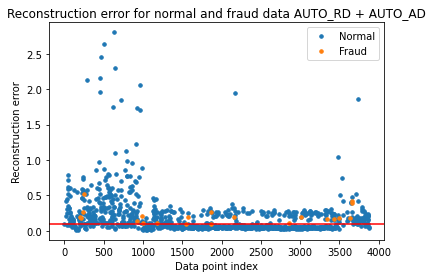

In [ ]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
threshold =  np.mean( error_df[error_df["True_class"]==True]["Reconstruction_error"])-np.std( error_df[error_df["True_class"]==True]["Reconstruction_error"])
plt.axhline(y= threshold, color='r', linestyle='-')
plt.title("Reconstruction error for normal and fraud data AUTO_RD + AUTO_AD")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

No comento los resultados con más detalle porque no es la estructura que mejor resultados nos ha dado.

## PCA + Autencoder

En este último apartado, vamos a reducir la dimensionalidad del data set utilizando PCA, y una vemos hayamos reducido , pasaremos estos datos transformsdos por un autoencoder para intentar detectar los datos anómalos.


---

A partir de la varianza explicada de la PCA, hemos deidido que el númro de componentes a transformar será 10. A partir de 10 cada dimensión extra aporta poca información

---



Text(0.5, 0, 'Número de dimensiones')

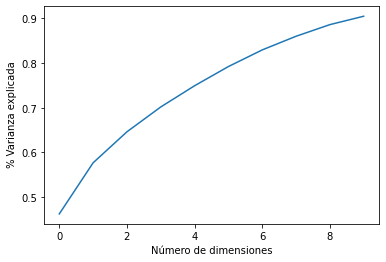

In [ ]:
pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel(" % Varianza explicada")
plt.xlabel("Número de dimensiones")

Text(0.5, 1.0, 'Distribucion de las dos primeras dimensiones en el espacio transformado')

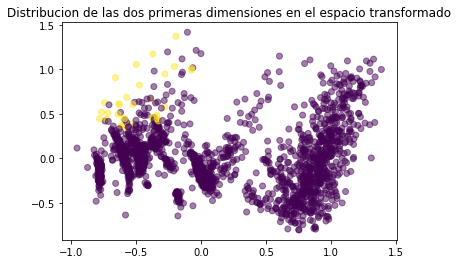

In [ ]:

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c= train_labels, alpha = 0.5)
plt.title("Distribucion de las dos primeras dimensiones en el espacio transformado")

Vems que los datos anómalos se separan un poco de los normales

In [ ]:
train_labels = y_train.astype(bool)
test_labels = y_test.astype(bool)#creating normal and fraud datasets
normal_train_data = X_train_pca[~train_labels]
normal_test_data = X_test_pca[~test_labels]
fraud_train_data = X_train_pca[train_labels]
fraud_test_data = X_test_pca[test_labels]
print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 34
 No. of records in Normal Train data= 2508
 No. of records in Fraud Test Data= 21
 No. of records in Normal Test data= 1069


Procedemos a montar el autoencoder

In [ ]:
dimension_entrada = 10
dimension_codificacion = 2



entrada = Input(shape=(dimension_entrada,))
encoded = Dense(36, activation='relu')(entrada)

encoded = Dense(16, activation='relu')(encoded)
#encoded = Dropout(0.1)(encoded)
encoded = Dense(8, activation='relu')(encoded)

encoded = Dense(dimension_codificacion, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(decoded)
#decoded= Dropout(0.1)(decoded)
decoded = Dense(36, activation='relu')(decoded)

decodificada = Dense(dimension_entrada, activation='sigmoid')(decoded)

autoencoder = Model(entrada,decodificada) 
autoencoder.compile(optimizer=  'adam' ,loss = 'mse')


history2 = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=50,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(normal_test_data,normal_test_data))

Epoch 1/50
79/79 [==============================] - 1s 8ms/step - loss: 0.2382 - val_loss: 0.0938
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0751 - val_loss: 0.0801
Epoch 3/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0706 - val_loss: 0.0706
Epoch 4/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0582 - val_loss: 0.0551
Epoch 5/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.0523
Epoch 6/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0480 - val_loss: 0.0496
Epoch 7/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0484
Epoch 8/50
79/79 [==============================] - 0s 6ms/step - loss: 0.0458 - val_loss: 0.0477
Epoch 9/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.0474
Epoch 10/50
79/79 [==============================] - 0s 5ms/step - loss: 0.0451 - val_loss: 0.0470
Epoch 11/50
79/79 [

In [ ]:
#X_test = X_test.reshape(738,20,20,1)

test_x_predictions = autoencoder.predict(X_test_pca)
mse = np.mean(np.abs(X_test_pca-test_x_predictions)**2
                    , axis = tuple(range(1,X_test_pca.ndim)))

error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

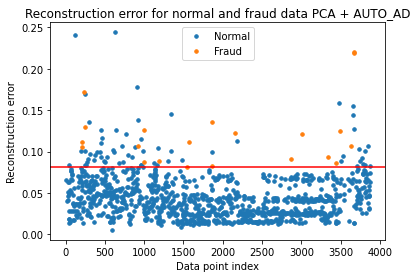

In [ ]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
threshold =  np.mean( error_df[error_df["True_class"]==True]["Reconstruction_error"]) - np.std( error_df[error_df["True_class"]==True]["Reconstruction_error"])
plt.axhline(y= threshold, color='r', linestyle='-')
plt.title("Reconstruction error for normal and fraud data PCA + AUTO_AD" )
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
print(np.mean(error_df[error_df["True_class"]==False]))
print(np.mean(error_df[error_df["True_class"]==True]))

teoric_fraud = []
teoric_ok = []
for i in range(len(error_df)):
  if (error_df.iloc[i,0]>= threshold):
    teoric_fraud.append(error_df.iloc[i][["Reconstruction_error","True_class"]])
  else :
    teoric_ok.append(error_df.iloc[i][["Reconstruction_error","True_class"]])

print("threshold:", threshold)

Reconstruction_error    0.046789
True_class              0.000000
dtype: float64
Reconstruction_error    0.151787
True_class              1.000000
dtype: float64
threshold: 0.10130129956883169


## Resultado

Vamos a describir los haciertos y erroes que hemos cometido:

Outliers:

In [ ]:
print("Numero de outliers en el data set original :",len(error_df[error_df["True_class"]==True]))
print("Numero de outliers etiquetados como tal :" , np.sum([i[1]== True for i in teoric_fraud]))

print("Accuracy: ",np.sum([i[1]== True for i in teoric_fraud])/len(error_df[error_df["True_class"]==True]))

Numero de outliers en el data set original : 21
Numero de outliers etiquetados como tal : 18
Accuracy:  0.8571428571428571


Inliers:

In [ ]:
print("Numero de inliers en el data set probado :", len(error_df[error_df["True_class"]==False])) 
print("Numero de intliers etiquetados como tal :",np.sum([i[1]== False for i in teoric_ok]))

print("Accuracy: ", np.sum([i[1]== False for i in teoric_ok])/len(error_df[error_df["True_class"]==False]))

Numero de inliers en el data set probado : 1069
Numero de intliers etiquetados como tal : 1025
Accuracy:  0.9588400374181478


Errores en el etiquetado

In [ ]:
print("Error en el etiquetado de inliers  :", np.sum([i[1]== True for i in teoric_ok])/len(error_df[error_df["True_class"]==True]),"%") 
print("Error en el etiquetado de outliers  :", np.sum([i[1]== False for i in teoric_fraud])/len(error_df[error_df["True_class"]==False]),"%") 

Error en el etiquetado de inliers  : 0.14285714285714285 %
Error en el etiquetado de outliers  : 0.0411599625818522 %


In [ ]:
33/1069
3/21

0.14285714285714285

Otro método para medir el acierto:

In [ ]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import MeanSquaredLogarithmicError

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == False else 1.0)
  return preds

In [ ]:

preds = get_predictions(autoencoder, X_test_pca, threshold)

## Accuracy:
accuracy_score(preds, y_test)


0.9788990825688073

# Resumen de resultados:  
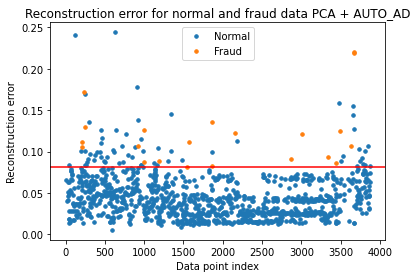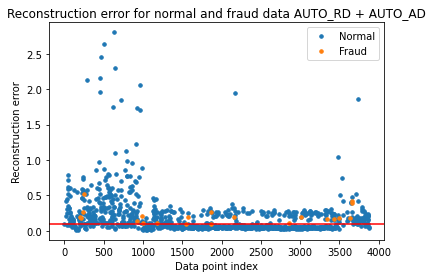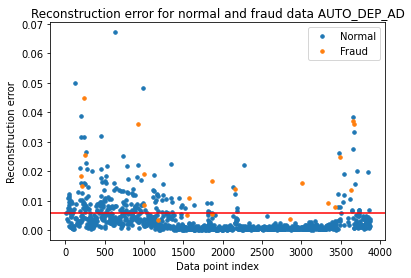

## Conclusión : 

Hemos realizado da detección de datos anómalos con tres estructuras diferentes : 

*   Autoencoder porfundo
*   Autoencoder reducion de dimensionalidad + Autoencoder detector anomalias
*   PCA y  Autoencoder detector anomalias


Donde mejores resultados hemos obtenido es en la PCA + Autoencoder. Esto puede deberse a que la reducción de la dimensionalidad mediante PCA ha conseguido encontrar las direcciones de máxima varianza de los datos  normales, separando aún mas los anómalos. 

Puede que nuestro autoencoder de reducción de la dimensionalidad, debido a su carácter altamente no lineal, no haya podido separar los dos tipos de datos, sino que ha encontrado direcciones no lineales lo que hacían era juntar más los datos. Esto último podemos verlo :

La primera estructura utilizada, el autoencoder profundo, ha dado unos resultados notables, pesee a partir de todo el data set entero. No obstante, vemos que una simpe reducción de dimension mediante PCA a mejorado significativamente los resultados.





Text(0.5, 1.0, 'Distribucion de las dos primeras dimensiones en el espacio transformado por el autoencoder')

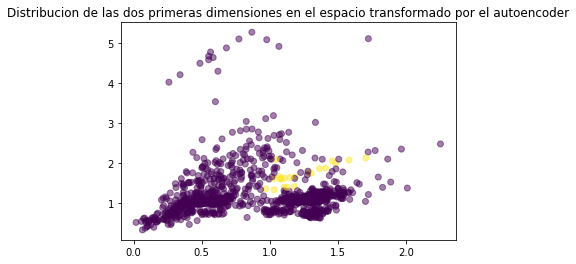

In [ ]:

plt.scatter(test_codificado[:,0], test_codificado[:,1], c= test_labels, alpha = 0.5)
plt.title("Distribucion de las dos primeras dimensiones en el espacio transformado por el autoencoder")

Vemos que pese a si estar separados los outliers del los conjuntos mas densos, hay muchos datos *normales* situados en zonas más alejadas, es por eso que nuestro autoencoder genera un gran error en la reconsruccón de  muchos inliers.